# Image Cartoonizer Project Using OpenCV
This project applies various image processing techniques to transform any image into a cartoon-style representation. The techniques used include:

*   Median Filters - For noise reduction
*   Laplacian Filters - For Edge Detection
*   Bilateral Filters - For smooth color preservation


By combining these techniques, the program enhances edges while smoothing color regions, resulting in a cartoonized effect.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files

Saving image.jpg to image.jpg


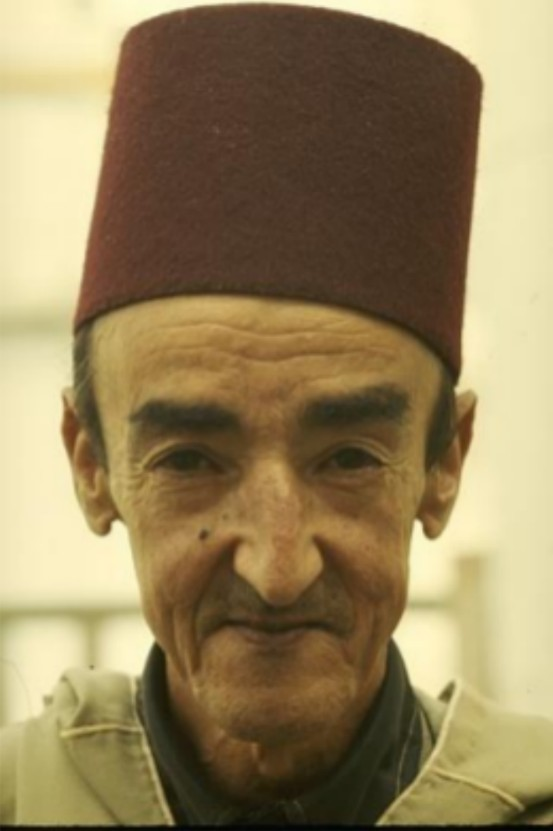

In [ ]:
image = cv2.imread(next(iter(files.upload())))

blurKernelSize = 7
minThreshold = 75
bilateralFilterIterations = 20

# To downscale large images
if image is not None and max(image.shape[0], image.shape[1]) > 1000:
  scaleDownPercentage = 25

  blurKernelSize=9
  minThreshold = 125
  bilateralFilterIterations = 40

  newWidth = int(image.shape[1] * scaleDownPercentage / 100)
  newHeight = int(image.shape[0] * scaleDownPercentage / 100)

  image = cv2.resize(image, (newWidth, newHeight), interpolation=cv2.INTER_AREA)

if image is not None:
  cv2_imshow(image)
else:
  print('Error loading image')

## Apply Median Filter to Remove Noise

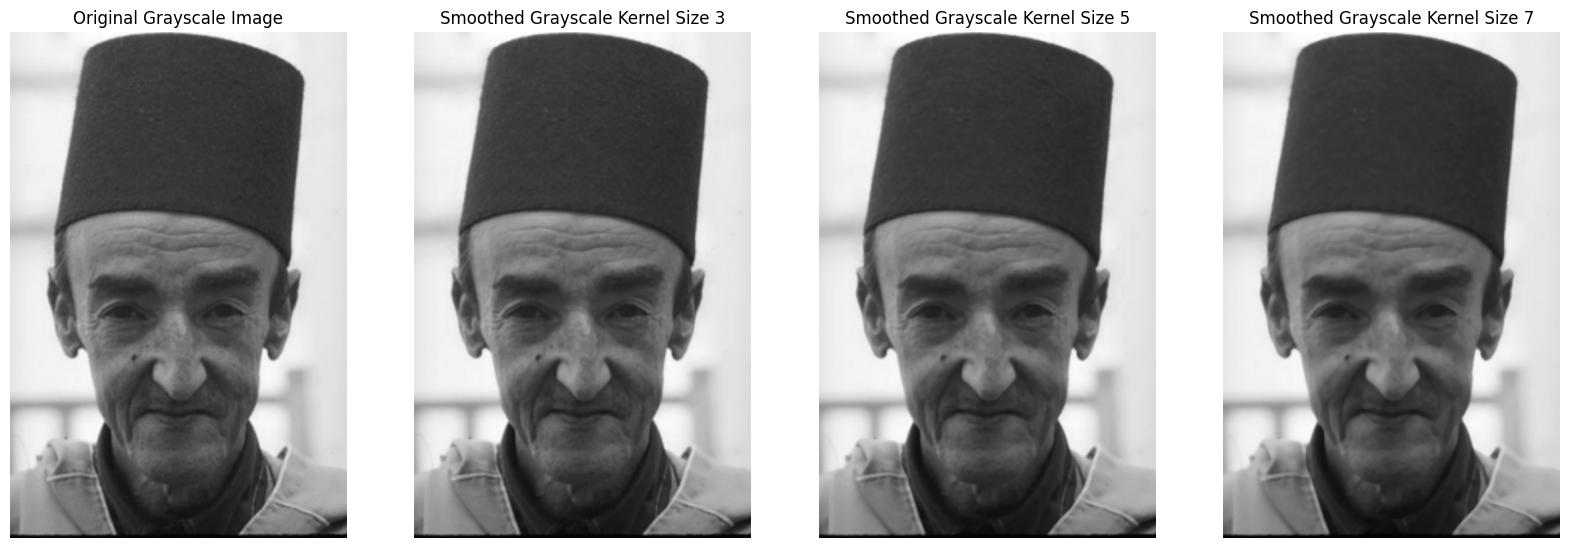

In [ ]:
# Convert to grayscale
grayScaleImage = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

fig, axes = plt.subplots(1, 4, figsize=(20, 10))
axes[0].imshow(grayScaleImage, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')


medianFilteredImage = None
medianKernelSizes = {3, 5, blurKernelSize}

for i, kernelSize in enumerate(medianKernelSizes):
  medianFilteredImage = cv2.medianBlur(grayScaleImage, kernelSize)
  axes[i+1].imshow(medianFilteredImage, cmap='gray')
  axes[i+1].set_title(f'Smoothed Grayscale Kernel Size {kernelSize}')
  axes[i+1].axis('off')


plt.show()


## Edge Detection Using Laplacian Filter

(-0.5, 552.5, 830.5, -0.5)

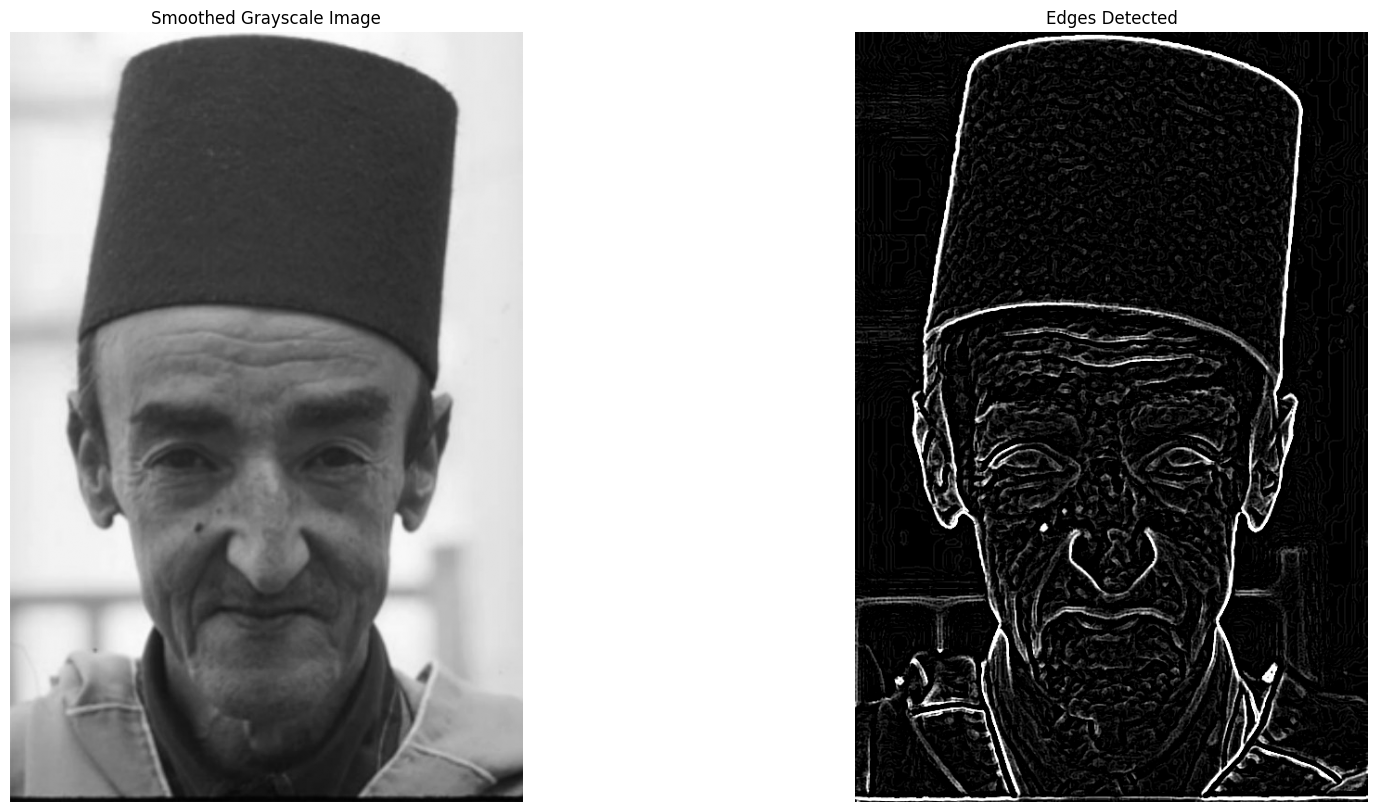

In [ ]:
laplacian = cv2.Laplacian(medianFilteredImage, cv2.CV_8U, ksize=5)
laplacian_abs = cv2.convertScaleAbs(laplacian)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(grayScaleImage, cmap='gray')
axes[0].set_title('Smoothed Grayscale Image')
axes[0].axis('off')

axes[1].imshow(laplacian_abs, cmap='gray')
axes[1].set_title('Edges Detected')
axes[1].axis('off')

A kernel size of 5 was found to be the most optimal, as increasing the size results in finer edges but introduces excessive noise, while smaller values fail to detect edges effectively.

##Thresholding

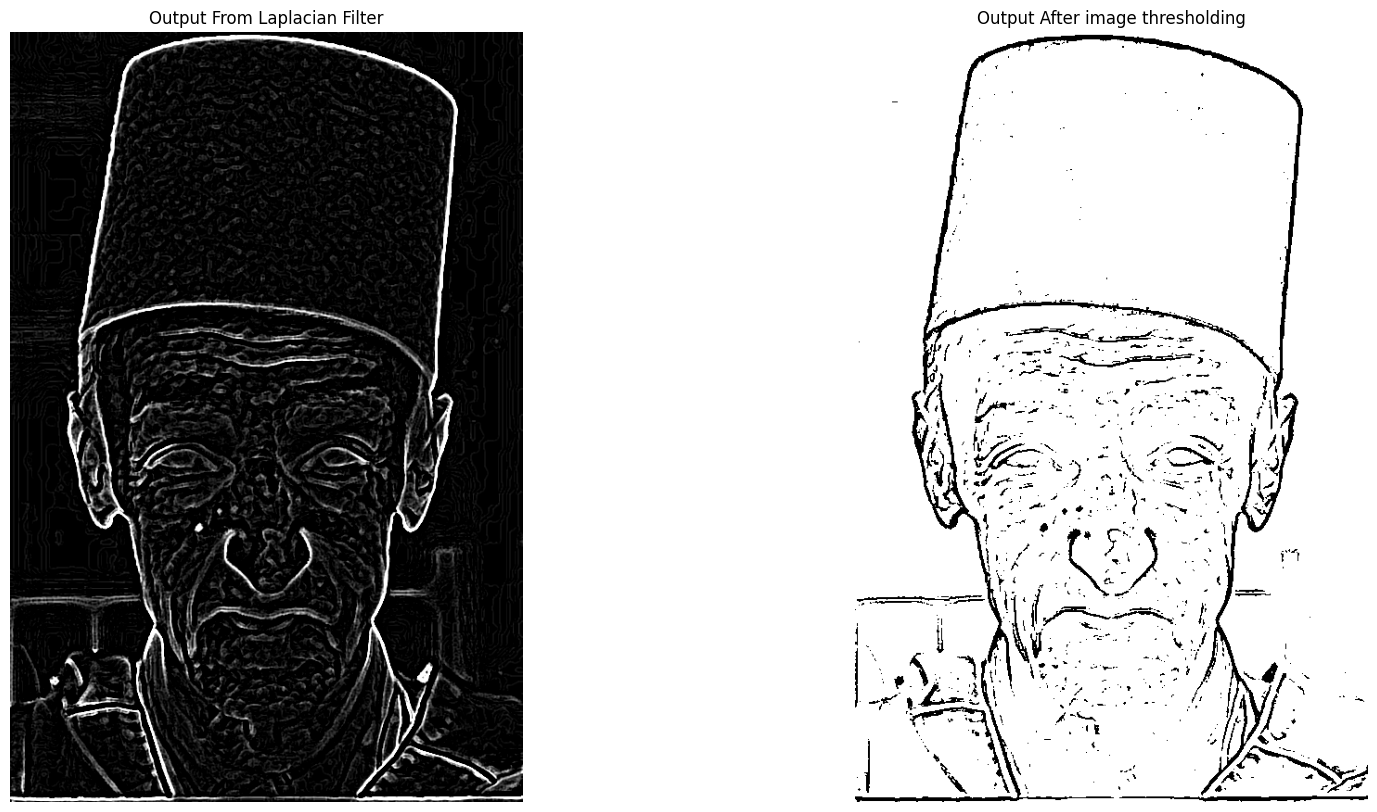

In [ ]:
ret, imageThresholdingOutput = cv2.threshold(laplacian_abs, minThreshold, 255, cv2.THRESH_BINARY_INV)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(laplacian_abs, cmap='gray')
axes[0].set_title('Output From Laplacian Filter')
axes[0].axis('off')

axes[1].imshow(imageThresholdingOutput, cmap='gray')
axes[1].set_title('Output After image thresholding')
axes[1].axis('off')

plt.show()

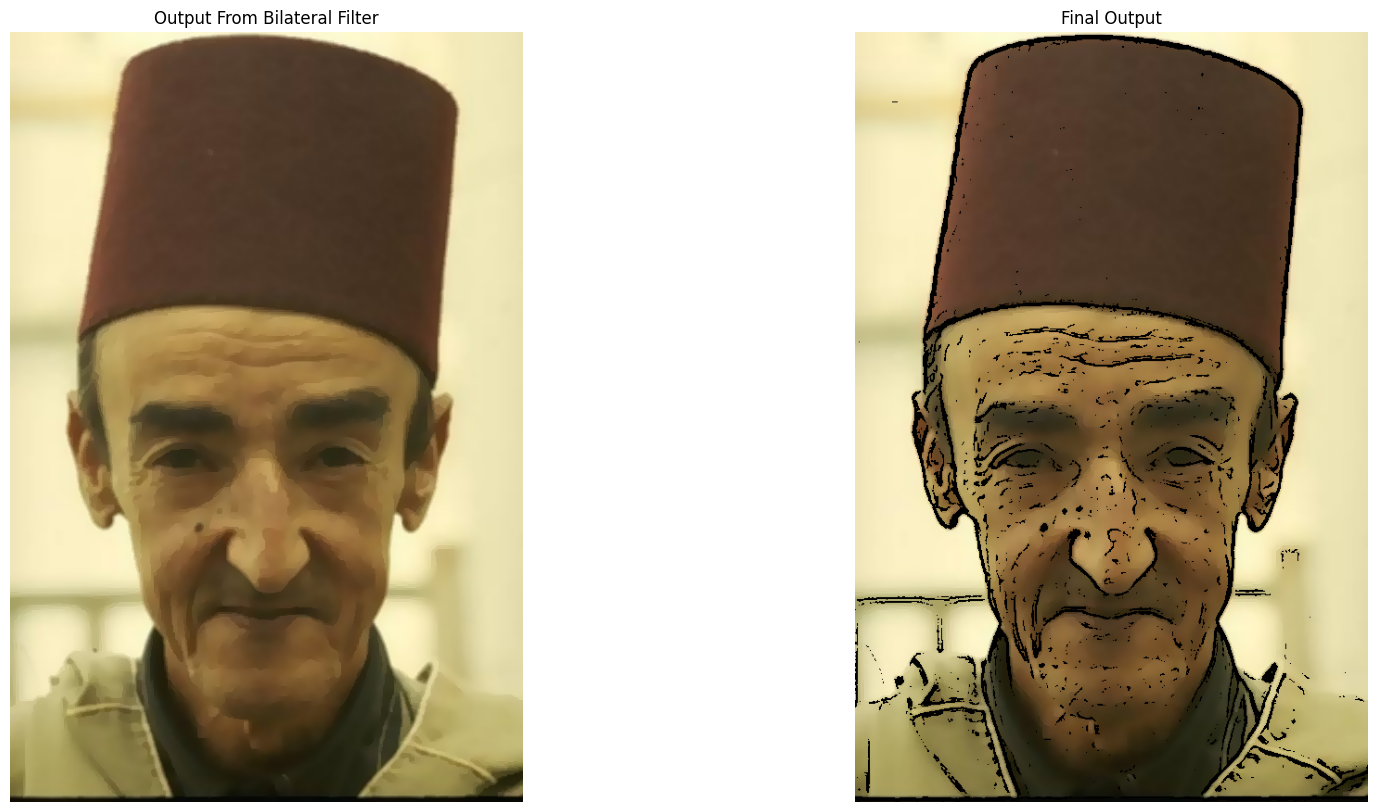

In [ ]:
filtered = image

# Apply small bilateral filter multiple times
for i in range(bilateralFilterIterations):
    filtered = cv2.bilateralFilter(filtered, d=5, sigmaColor=9, sigmaSpace=9)

# Combine edge mask and bilaterally filtered image
output = cv2.bitwise_and(filtered, filtered, mask=imageThresholdingOutput)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))
axes[0].set_title('Output From Bilateral Filter')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axes[1].set_title('Final Output')
axes[1].axis('off')

plt.show()

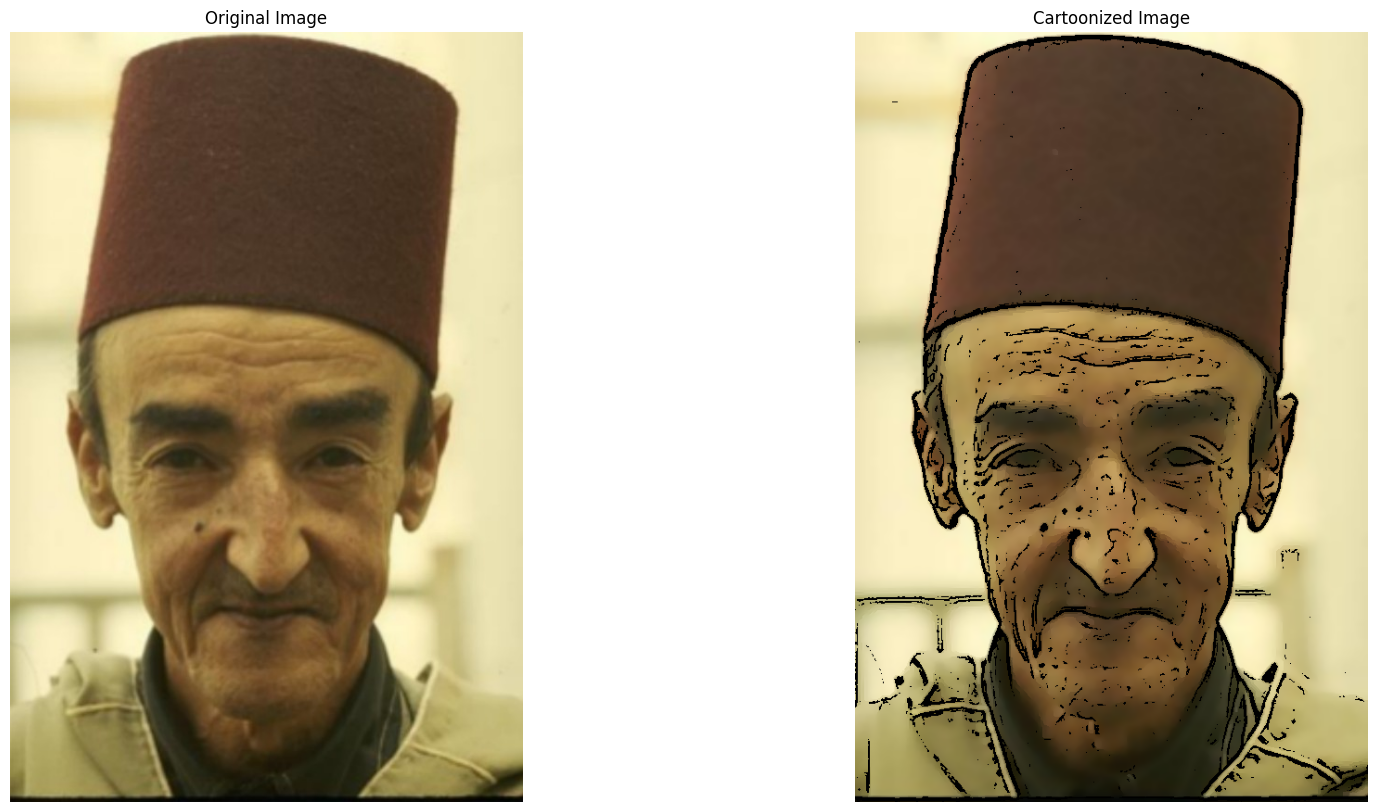

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axes[1].set_title('Cartoonized Image')
axes[1].axis('off')

plt.show()